In [4]:
import pandas as pd

### Building Dataset

In [5]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [9]:
# Load each dataset
cleavland_dataset = pd.read_csv("Cleavland.csv", header=None, names=col_names)
hung_dataset = pd.read_csv("hung.csv", header=None, names=col_names)
switzerland_dataset = pd.read_csv("Switzerland.csv", header=None, names=col_names)

In [13]:
cleavland_dataset.shape

(303, 14)

In [14]:
hung_dataset.shape

(294, 14)

In [15]:
switzerland_dataset.shape

(123, 14)

In [17]:
all_data = pd.concat([cleavland_dataset, hung_dataset, switzerland_dataset], ignore_index=True)
all_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [18]:
all_data.shape
# 303 + 294 + 123 -> 720

(720, 14)

In [19]:
df = all_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,70.0,1.0,4.0,115,0,0,1,92,1,0,2,?,7,1
716,70.0,1.0,4.0,140,0,1,0,157,1,2,2,?,7,3
717,72.0,1.0,3.0,160,0,?,2,114,0,1.6,2,2,?,0
718,73.0,0.0,3.0,160,0,0,1,121,0,0,1,?,3,1


### a. Data cleaning(Remove NA, ?, Negative values etc.)


In [23]:
for col in df.columns:
    print(col, df[col].unique())

age [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76. 28. 30. 31. 32. 33. 36. 72. 73.]
sex [1. 0.]
cp [1. 4. 3. 2.]
trestbps [145.0 160.0 120.0 130.0 140.0 172.0 150.0 110.0 132.0 117.0 135.0 112.0
 105.0 124.0 125.0 142.0 128.0 170.0 155.0 104.0 180.0 138.0 108.0 134.0
 122.0 115.0 118.0 100.0 200.0 94.0 165.0 102.0 152.0 101.0 126.0 174.0
 148.0 178.0 158.0 192.0 129.0 144.0 123.0 136.0 146.0 106.0 156.0 154.0
 114.0 164.0 '130' '120' '140' '170' '100' '105' '110' '125' '150' '98'
 '112' '145' '190' '160' '115' '142' '180' '132' '135' '?' '108' '124'
 '113' '122' '92' '118' '106' '200' '138' '136' '128' '155' '95' '165'
 '80' '185']
chol [233.0 286.0 229.0 250.0 204.0 236.0 268.0 354.0 254.0 203.0 192.0 294.0
 256.0 263.0 199.0 168.0 239.0 275.0 266.0 211.0 283.0 284.0 224.0 206.0
 219.0 340.0 226.0 247.0 167.0 230.0 335.0 234.0 177.0 276.0 353.0 243.0
 225.0 302.0 212

In [31]:
# We can see there is inconsistency in above data as some values are of type string and some of type int to handle this
# Convert columns to proper numeric format
df['trestbps'] = pd.to_numeric(df['trestbps'], errors='coerce')
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')
df['thalach'] = pd.to_numeric(df['thalach'], errors='coerce')
df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['slope'] = pd.to_numeric(df['slope'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
# We use pd.to_numeric() to convert the specified columns to numeric format. 
# The errors='coerce' parameter ensures that any values that cannot be converted to numeric format will be replaced with NaN (missing values).

In [32]:
for col in df.columns:
    print(col, df[col].unique())

age [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76. 28. 30. 31. 32. 33. 36. 72. 73.]
sex [1. 0.]
cp [1. 4. 3. 2.]
trestbps [145.         160.         120.         130.         140.
 172.         150.         110.         132.         117.
 135.         112.         105.         124.         125.
 142.         128.         170.         155.         104.
 180.         138.         108.         134.         122.
 115.         118.         100.         200.          94.
 165.         102.         152.         101.         126.
 174.         148.         178.         158.         192.
 129.         144.         123.         136.         146.
 106.         156.         154.         114.         164.
  98.         190.         131.80474198 113.          92.
  95.          80.         185.        ]
chol [233.         286.         229.         250.         204.
 236.         26

Filling missing values with their mean values

In [28]:
df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
df['chol'].fillna(df['chol'].mean(), inplace=True)
df['thalach'].fillna(df['thalach'].mean(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

In [35]:
# As ca and thal values have limited set of specific values so we will replace null values with mode
# Mode will give me max occured frequency of them
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)

In [36]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### b. Error correcting(Outlier detection and removal)

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

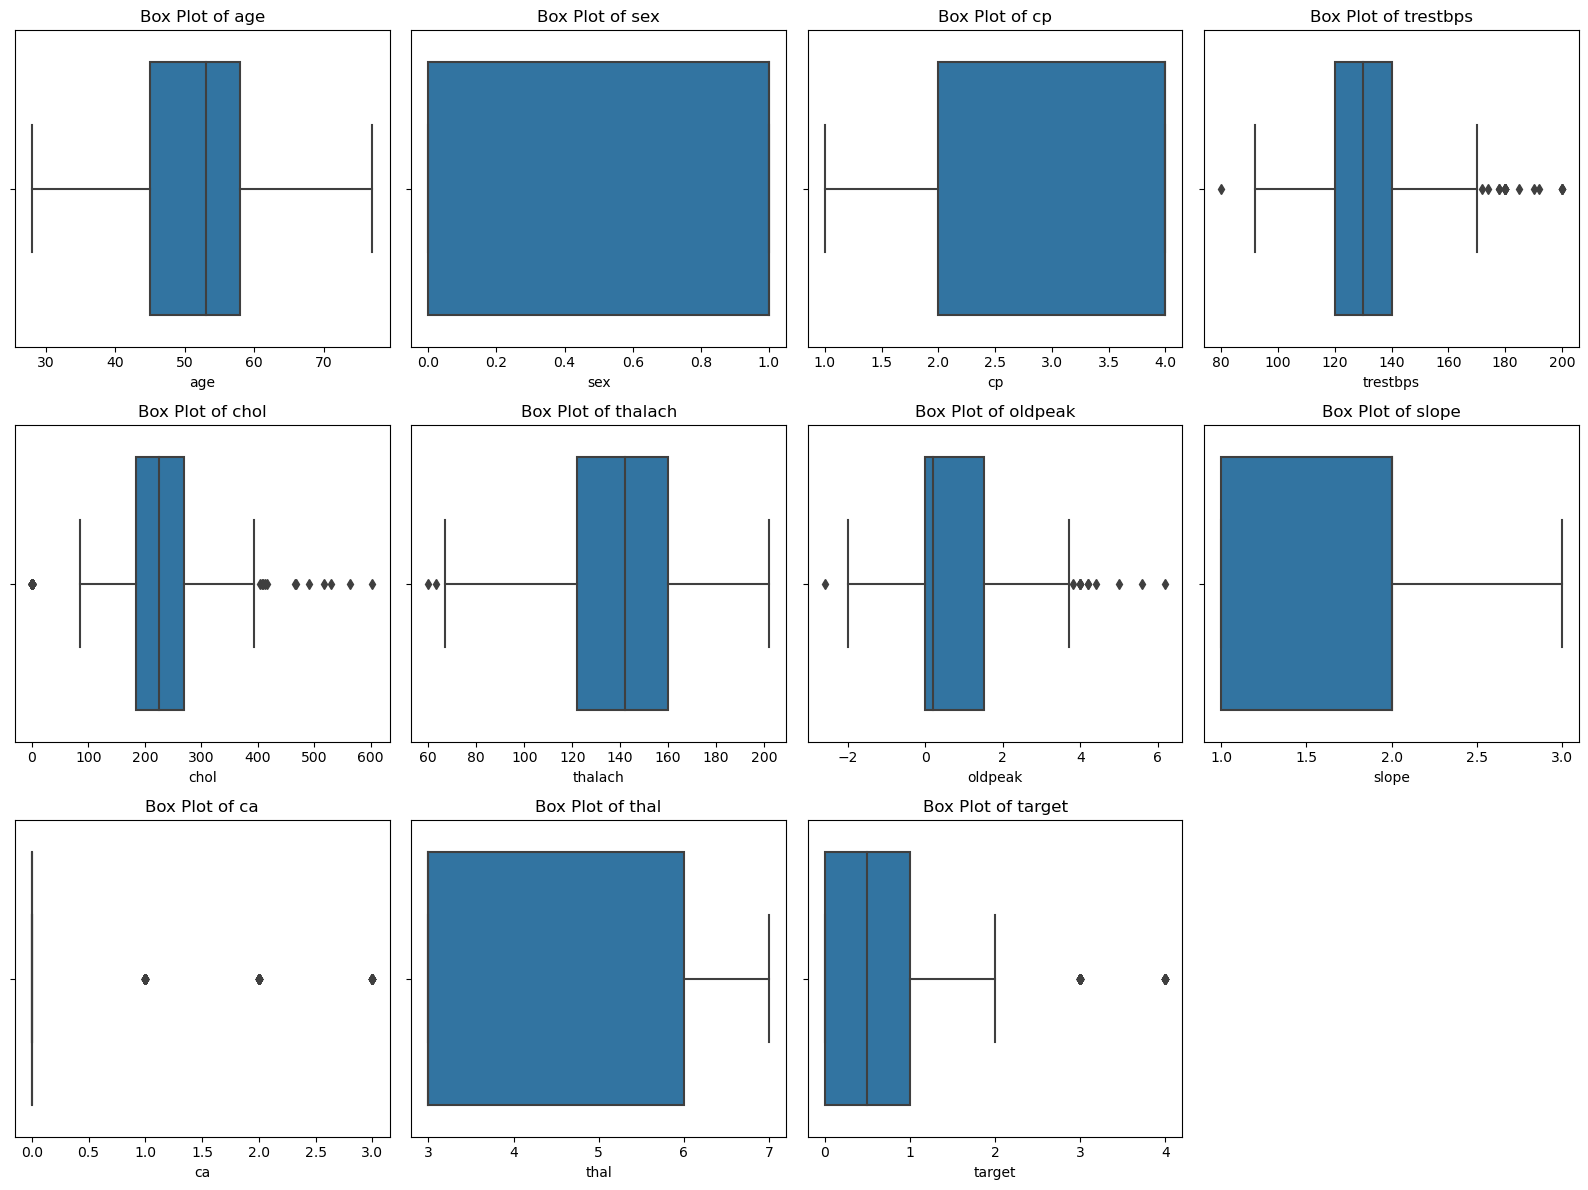

In [48]:
def visualize_boxplots(df):
    # Get the number of numerical columns
    num_cols = len(df.select_dtypes(include=['float64', 'int64']).columns)
    
    # Calculate the number of rows and columns for subplots
    num_rows = (num_cols + 3) // 4
    num_cols = min(num_cols, 4)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))
    
    # Flatten axes if needed
    axes = axes.flatten()
    
    # Iterate over each numerical column
    for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
        sns.boxplot(ax=axes[i], x=df[column])
        axes[i].set_title(f'Box Plot of {column}')
        axes[i].set_xlabel(column)
    
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_boxplots(df)


In [52]:
# Define threshold values for each column
threshold_values = {
    'age': 70,
    'sex': 1,
    'cp': 4,
    'trestbps': 170,
    'chol': 395,
    'thalach': 1,
    'oldpeak': 3,
    'thalach': 250,
    'target': 3,
    'oldpeak': 3.5,
    'slope': 3,
    'ca': 5,  # Update threshold value for 'ca' column
    'thal': 10  # Update threshold value for 'thal' column
}


Removing outliers for column: age


c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


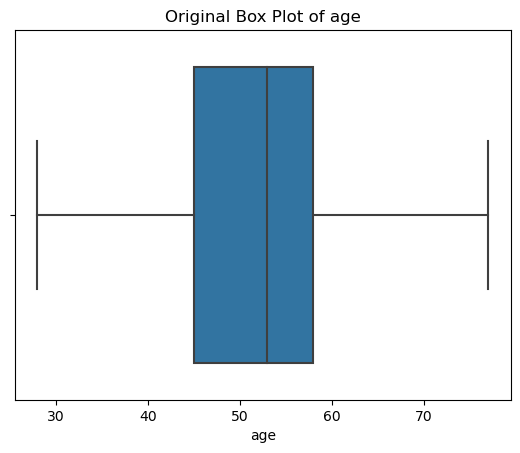

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


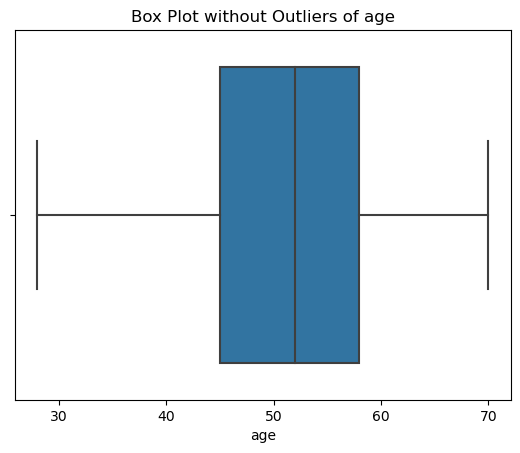

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Removing outliers for column: sex


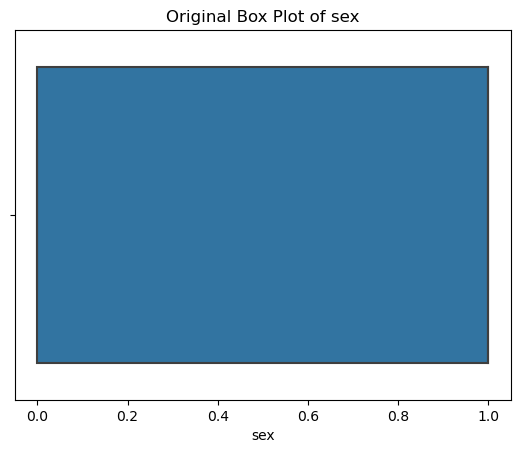

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


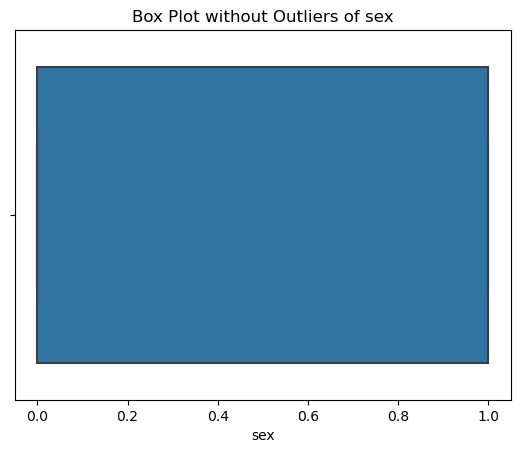

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Removing outliers for column: cp


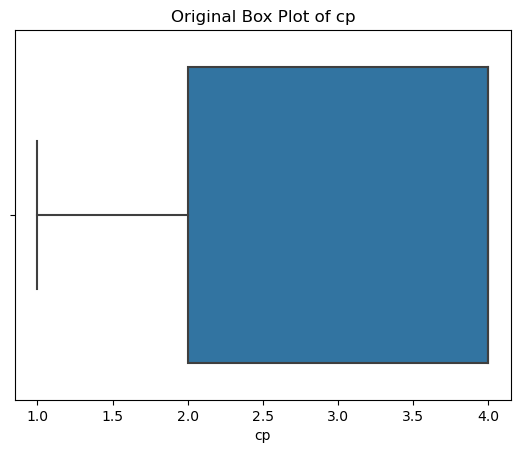

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


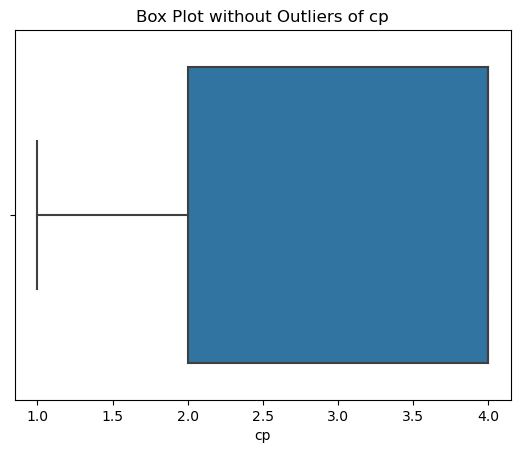

Removing outliers for column: trestbps


c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


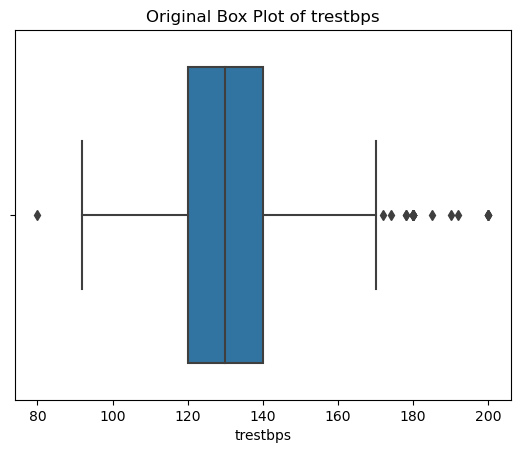

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


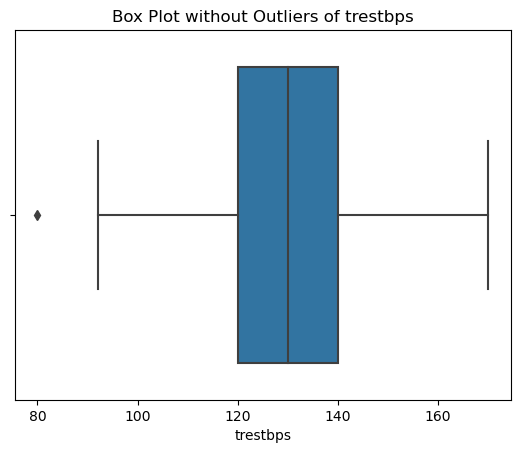

Removing outliers for column: chol


c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


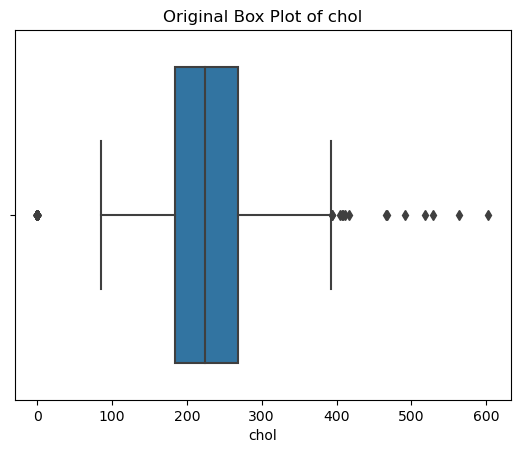

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


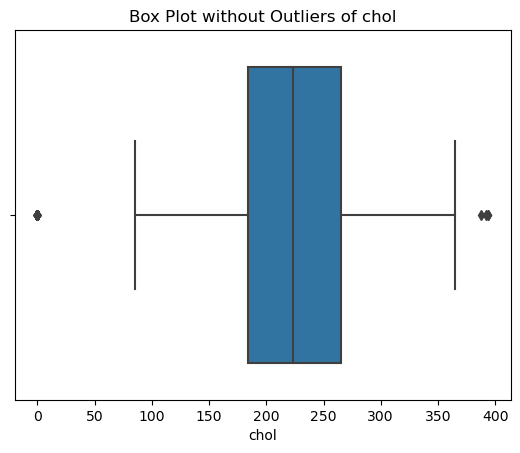

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Removing outliers for column: thalach


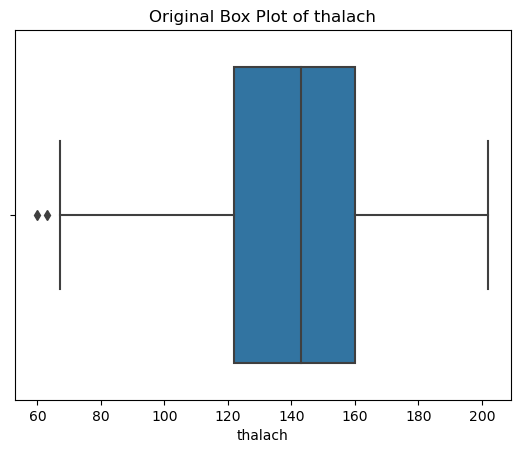

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


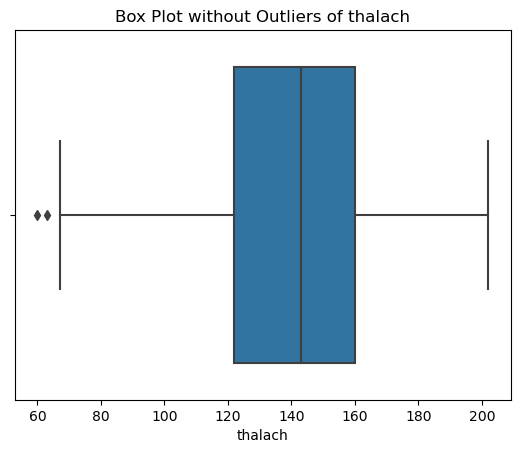

Removing outliers for column: oldpeak


c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


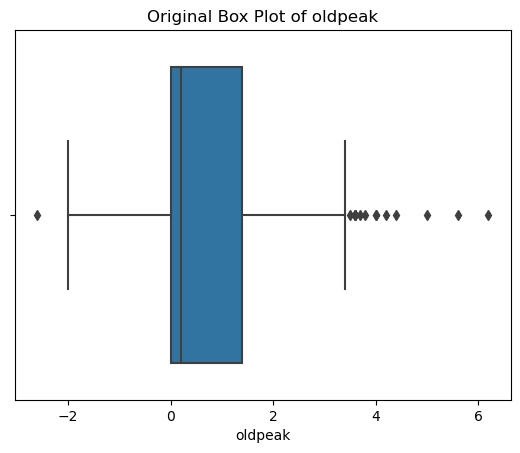

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


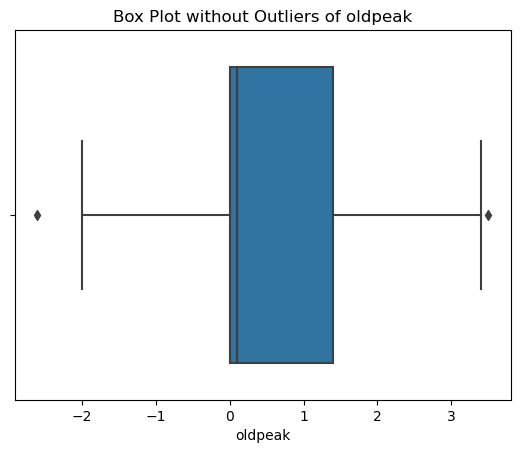

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Removing outliers for column: target


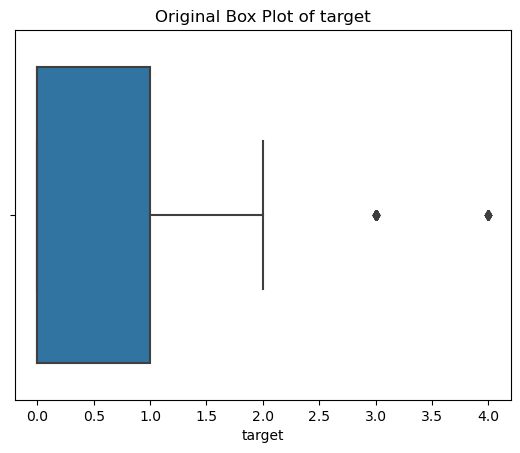

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


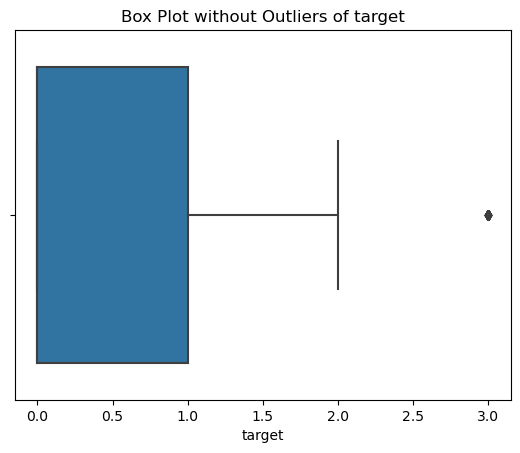

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Removing outliers for column: slope


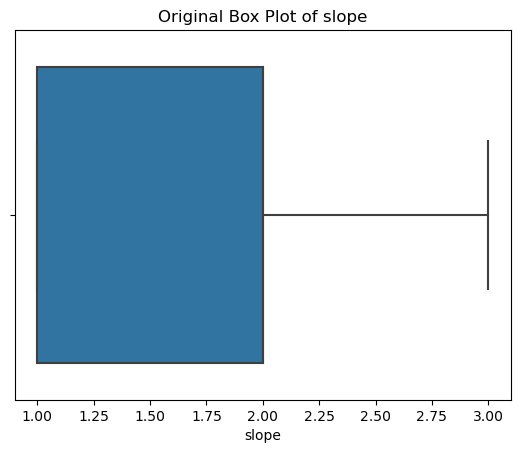

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


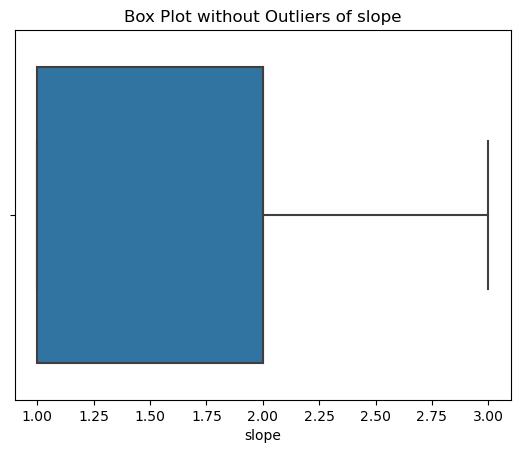

Removing outliers for column: ca


c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


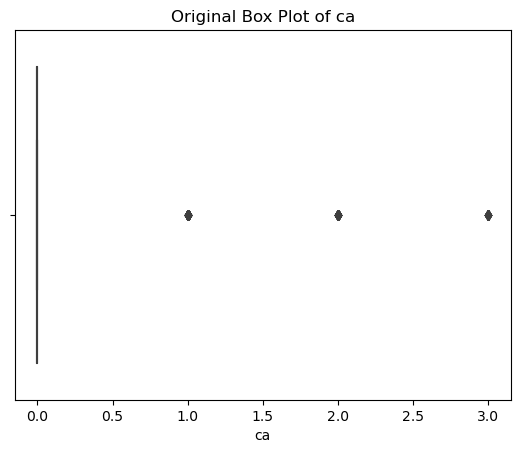

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


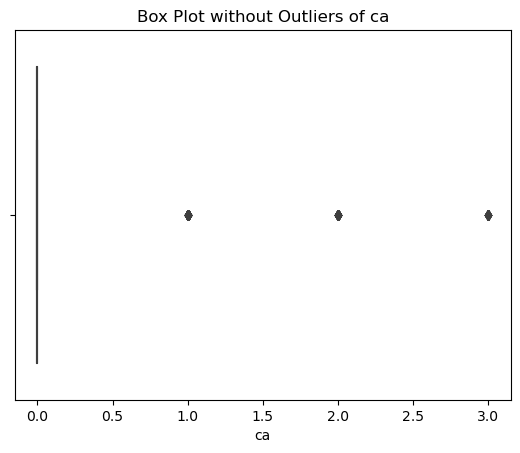

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Removing outliers for column: thal


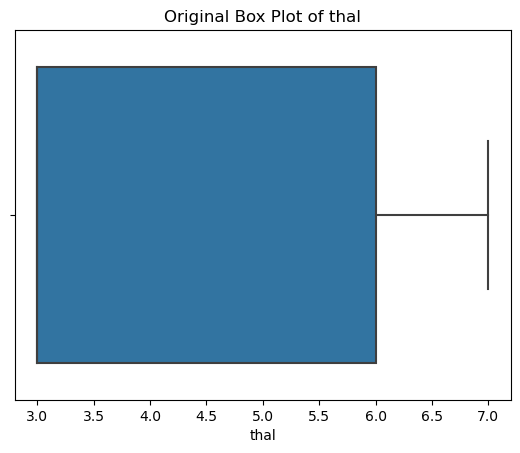

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


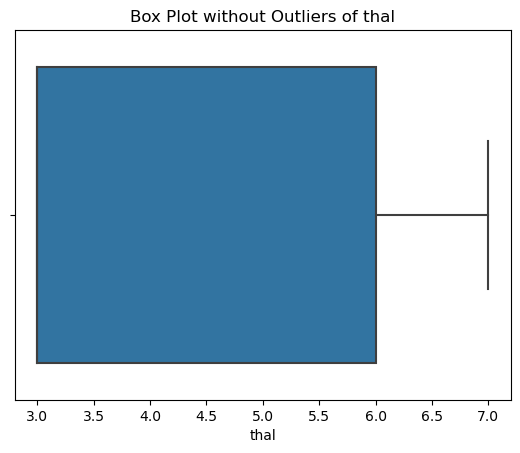

In [54]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

def remove_outliers_for_all_columns(df, threshold_values):
    # Iterate over each column and corresponding threshold value
    for column, threshold in threshold_values.items():
        print(f"Removing outliers for column: {column}")
        df = removal_box_plot(df, column, threshold)
    return df

new_df = remove_outliers_for_all_columns(df, threshold_values)


### c. Data transformation

1. One-Hot Encoding:
    - One-hot encoding is used to convert categorical variables into a binary matrix, where each category becomes a separate binary feature.
    - Each category is represented by a binary column, where a value of 1 indicates the presence of the category and 0 indicates absence.
    - This technique is useful when there is no ordinal relationship between categories.
2. Label Encoding:
    - Label encoding is used to convert categorical variables into numerical labels.
    - Each category is assigned a unique integer value.
    - This technique is suitable when there is an ordinal relationship between categories.

In [55]:
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.000000,233.0,1.0,2.0,150.00000,0.0,2.300000,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.000000,286.0,0.0,2.0,108.00000,1.0,1.500000,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.000000,229.0,0.0,2.0,129.00000,1.0,2.600000,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.000000,250.0,0.0,0.0,187.00000,0.0,3.500000,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.000000,204.0,0.0,2.0,172.00000,0.0,1.400000,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,68.0,1.0,4.0,145.000000,0.0,?,0,136.00000,0,1.800000,1.0,0.0,3.0,1
713,69.0,1.0,4.0,135.000000,0.0,0,0,130.00000,0,0.000000,2.0,0.0,6.0,1
714,69.0,1.0,4.0,131.804742,0.0,0,1,140.56546,?,0.789636,2.0,0.0,7.0,3
715,70.0,1.0,4.0,115.000000,0.0,0,1,92.00000,1,0.000000,2.0,0.0,7.0,1


In [ ]:
df['sex'].replace(['F', 'M '], [0, 1], inplace=True)

In [68]:
new_df[new_df["sex"] == 0.0].count().unique()

array([165], dtype=int64)

### d. Build Data model using regression and kNN methods and compare accuracy of heart disease prediction

<AxesSubplot:>

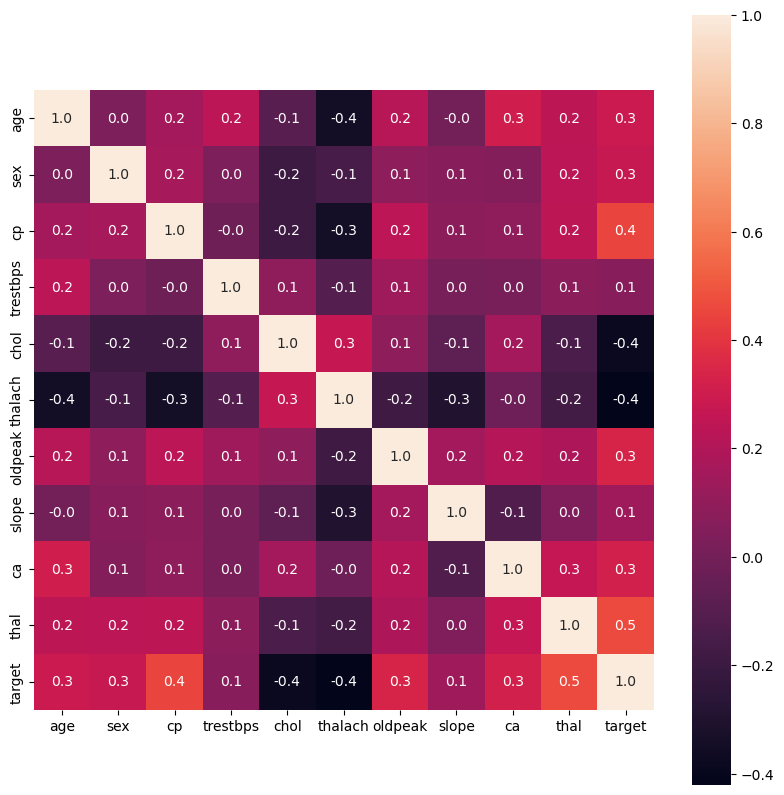

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(data = new_df.corr(),cbar=True,square=True,fmt='.1f',annot=True)

In [108]:
attribute = new_df[['age', 'sex', 'cp', 'thal', 'oldpeak', 'ca']]

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
train_x, test_x, train_y, test_y = train_test_split(attribute, new_df['target'], test_size=0.25, random_state=0)

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_absolute_error

In [112]:
lr = LogisticRegression()
lr.fit(train_x,train_y)

c:\Users\mansi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
lr_y_pred = lr.predict(test_x)

In [114]:
lr_acc = accuracy_score(test_y,lr_y_pred)
lr_acc

0.6380368098159509

In [115]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

c:\Users\mansi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\mansi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Minimum error:- 0.37423312883435583 at K = 3


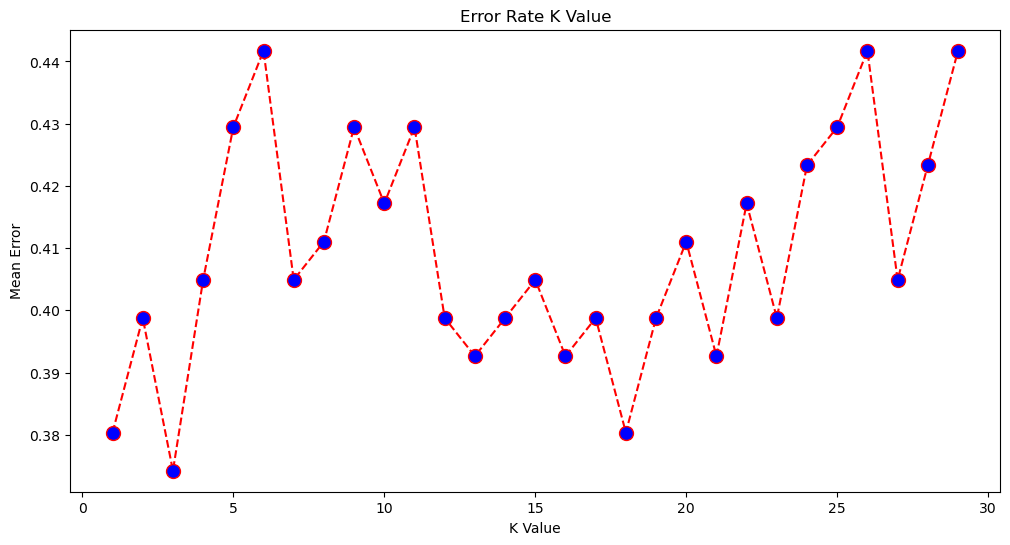

In [116]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error.append(np.mean(pred_i!= test_y))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [119]:
classifier= KNeighborsClassifier(n_neighbors=3)  
classifier.fit(train_x, train_y)
y_pred= classifier.predict(test_x) 
from sklearn.metrics import confusion_matrix  
confusion_matrix(test_y, y_pred)

c:\Users\mansi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[73, 10,  0,  0],
       [25, 26,  0,  1],
       [ 5,  5,  2,  1],
       [ 6,  7,  1,  1]], dtype=int64)

In [120]:
accuracy_score(test_y, y_pred)

0.6257668711656442